In [2]:
import importlib
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

from CASutils import plotposition_utils as plotpos
importlib.reload(plotpos)

<module 'CASutils.plotposition_utils' from '/home/islas/python/CASanalysis/CASutils/plotposition_utils.py'>

In [3]:
plotpath="/project/cas/islas/python_plots/snowpaper/FIGURES/"

In [4]:
#data_cam = xr.open_dataset("/project/cas/islas/python_savs/snowpaper/DATA_SORT/t850_laggedregs/laggedreg_cam.nc")
data_scam = xr.open_dataset("/project/cas/islas/python_savs/snowpaper/DATA_SORT/t850_laggedregs/laggedreg_scam.nc")

In [5]:
def plotlaggedreg(data,titlestr,ylabelstr,x1,x2,y1,y2,color='darkred',yticks=None,yticknames=None,yrange=None, xlabel=False):
    ax = fig.add_axes(np.array([x1,y1,(x2-x1),(y2-y1)]))
    ax.plot([-10,10],[0,0],color='black')
    ax.plot(np.arange(-10,11,1), data, color=color, linewidth=2)
    ax.set_xticks([-10,-8,-6,-4,-2,0,2,4,6,8,10])
    ax.set_xticklabels(['-10','-8','-6','-4','-2','0','2','4','6','8','10'], fontsize=12)
    ax.set_ylabel(ylabelstr, fontsize=14)
    ax.set_title(titlestr, fontsize=16)
    ax.set_xlim(-10,10)
    
    if (yticks):
        ax.set_yticks(yticks)
        ax.set_yticklabels(yticknames, fontsize=12)
        
    if (yrange):
        ax.set_ylim(yrange)
        
    if (xlabel):
        ax.set_xlabel('Lag (days)', fontsize=14)
        
    return ax

def oplotlaggedreg(ax, data, color='darkred'):
    ax.plot(np.arange(-10,11,1), data, color=color, linewidth=2)
    return ax

In [6]:
x1, x2, y1, y2 = plotpos.get3by6coords()

In [7]:
netclm5 = -1.*data_scam.fsnsregclm5 + data_scam.flnsregclm5 + data_scam.shflxregclm5 + data_scam.lhflxregclm5
netsnowd = -1.*data_scam.fsnsregsnowd + data_scam.flnsregsnowd + data_scam.shflxregsnowd + data_scam.lhflxregsnowd

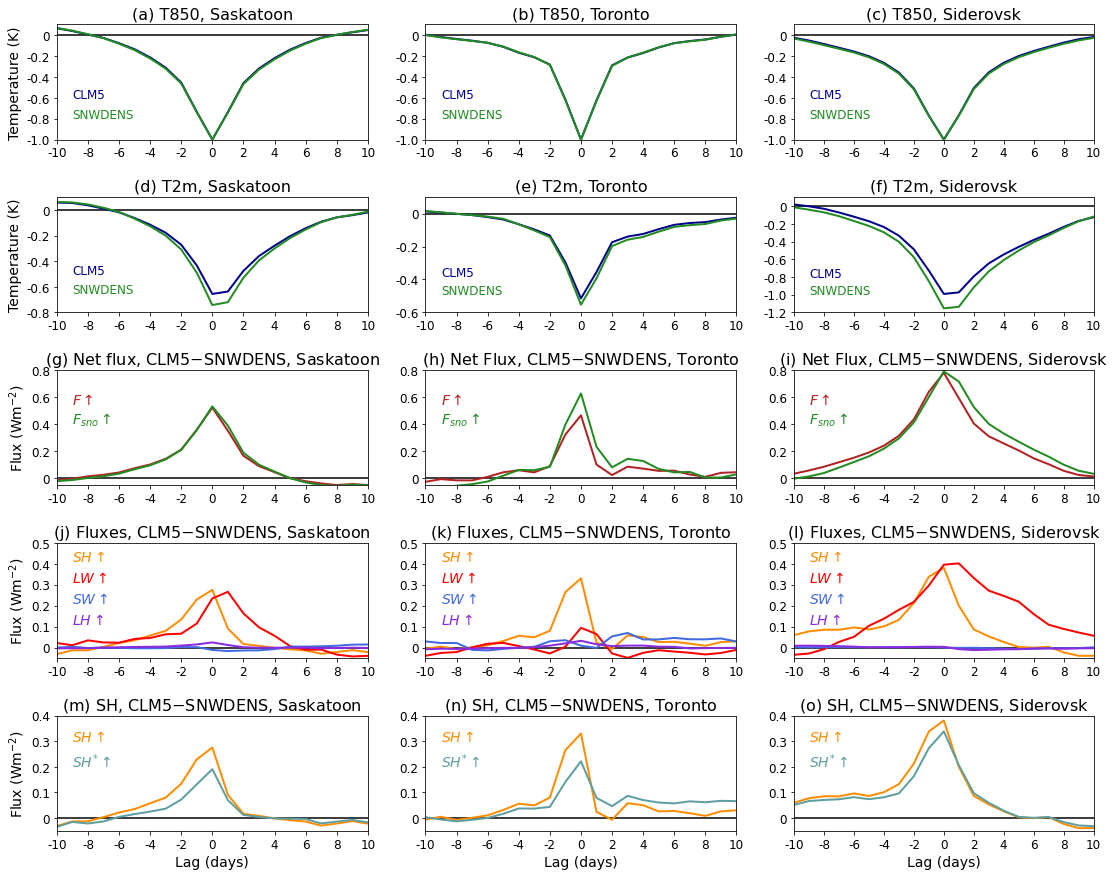

In [8]:
fig = plt.figure(figsize=(16,16))

cityplot=0
ax = plotlaggedreg(-1.*(data_scam.t850regclm5.isel(city=cityplot)),'(a) T850, Saskatoon','Temperature (K)',x1[0],x2[0],y1[0],y2[0], color='darkblue',
                   yrange=(-1,0.1),yticks=[-1,-0.8,-0.6,-0.4,-0.2,0],yticknames=['-1.0','-0.8','-0.6','-0.4','-0.2','0'])
ax = oplotlaggedreg(ax,-1.*(data_scam.t850regsnowd.isel(city=cityplot)), color='forestgreen')
ax.text(-9,-0.6,'CLM5',color='darkblue',fontsize=12)
ax.text(-9,-0.8,'SNWDENS',color='forestgreen',fontsize=12)

ax = plotlaggedreg(-1.*(data_scam.trefhtregclm5.isel(city=cityplot)),'(d) T2m, Saskatoon','Temperature (K)',x1[3],x2[3],y1[3],y2[3], color='darkblue',
                  yrange=(-0.8,0.1),yticks=[-0.8,-0.6,-0.4,-0.2,0],yticknames=['-0.8','-0.6','-0.4','-0.2','0'])
ax = oplotlaggedreg(ax,-1.*(data_scam.trefhtregsnowd.isel(city=cityplot)), color='forestgreen')
ax.text(-9,-0.5,'CLM5',color='darkblue',fontsize=12)
ax.text(-9,-0.65,'SNWDENS',color='forestgreen',fontsize=12)


ax = plotlaggedreg(-1.*(netclm5.isel(city=cityplot) - netsnowd.isel(city=cityplot)),'(g) Net flux, CLM5$-$SNWDENS, Saskatoon','Flux (Wm$^{-2}$)',
                   x1[6],x2[6],y1[6],y2[6],color='firebrick',
                  yrange=(-0.05,0.8),yticks=[0,0.2,0.4,0.6,0.8],yticknames=['0','0.2','0.4','0.6','0.8'])
ax = oplotlaggedreg(ax, -1.*(data_scam.bulksnowregclm5.isel(city=cityplot)-data_scam.bulksnowregsnowd.isel(city=cityplot)),color='forestgreen')
ax.text(-9,0.55,'$F\\uparrow$',color='firebrick', fontsize=14)
ax.text(-9,0.4,'$F_{sno}\\uparrow$',color='forestgreen', fontsize=14)


ax = plotlaggedreg(-1.*(data_scam.shflxregclm5.isel(city=cityplot) - data_scam.shflxregsnowd.isel(city=cityplot)),
                   '(j) Fluxes, CLM5$-$SNWDENS, Saskatoon','Flux (Wm$^{-2}$)',x1[9],x2[9],y1[9],y2[9],color='darkorange',
                  yrange=(-0.05,0.5),yticks=[0,0.1,0.2,0.3,0.4,0.5],yticknames=['0','0.1','0.2','0.3','0.4','0.5'])
ax = oplotlaggedreg(ax, -1.*(data_scam.flnsregclm5.isel(city=cityplot) - data_scam.flnsregsnowd.isel(city=cityplot)), color='red')
ax = oplotlaggedreg(ax, (data_scam.fsnsregclm5.isel(city=cityplot) - data_scam.fsnsregsnowd.isel(city=cityplot)), color='royalblue')
ax = oplotlaggedreg(ax, -1.*(data_scam.lhflxregclm5.isel(city=cityplot) - data_scam.lhflxregsnowd.isel(city=cityplot)), color='blueviolet')
ax.text(-9,0.41,'$SH\\uparrow$',color='darkorange',fontsize=14)
ax.text(-9,0.31,'$LW\\uparrow$',color='red',fontsize=14)
ax.text(-9,0.21,'$SW\\uparrow$',color='royalblue',fontsize=14)
ax.text(-9,0.11,'$LH\\uparrow$',color='blueviolet',fontsize=14)


#ax = plotlaggedreg(-1.*(data_scam.trefhtregclm5.isel(city=cityplot) - data_scam.trefhtregsnowd.isel(city=cityplot)),' ',' ',x1[9],x2[9],y1[9],y2[9], color='black')
#ax2 = ax.twinx()
#ax2 = oplotlaggedreg(ax2, -1.*(data_scam.shflxregclm5.isel(city=cityplot) - data_scam.shflxregsnowd.isel(city=cityplot)), color='darkorange')
#ax2 = oplotlaggedreg(ax2, -1.*(data_scam.flnsregclm5.isel(city=cityplot) - data_scam.flnsregsnowd.isel(city=cityplot)), color='red')
#ax2 = oplotlaggedreg(ax2, (data_scam.fsnsregclm5.isel(city=cityplot) - data_scam.fsnsregsnowd.isel(city=cityplot)), color='royalblue')
#ax2 = oplotlaggedreg(ax2, -1.*(data_scam.lhflxregclm5.isel(city=cityplot) - data_scam.lhflxregsnowd.isel(city=cityplot)), color='blueviolet')


ax = plotlaggedreg(-1.*(data_scam.shflxregclm5.isel(city=cityplot) - data_scam.shflxregsnowd.isel(city=cityplot)),
                   '(m) SH, CLM5$-$SNWDENS, Saskatoon','Flux (Wm$^{-2}$)',
                  x1[12],x2[12],y1[12],y2[12],color='darkorange', xlabel=True,
                  yrange=(-0.05,0.4),yticks=[0,0.1,0.2,0.3,0.4],yticknames=['0','0.1','0.2','0.3','0.4'])
ax = oplotlaggedreg(ax, -1.*(data_scam.shflxconstructregclm5.isel(city=cityplot) - data_scam.shflxconstructregsnowd.isel(city=cityplot)),color='cadetblue')
ax.text(-9,0.3,'$SH\\uparrow$', color='darkorange',fontsize=14)
ax.text(-9,0.2,'$SH^{*}\\uparrow$',color='cadetblue',fontsize=14)


cityplot=1

ax = plotlaggedreg(-1.*(data_scam.t850regclm5.isel(city=cityplot)),'(b) T850, Toronto',' ',x1[1],x2[1],y1[0],y2[0], color='darkblue', 
                   yrange=(-1,0.1),yticks=[-1,-0.8,-0.6,-0.4,-0.2,0],yticknames=['-1.0','-0.8','-0.6','-0.4','-0.2','0'] )
ax = oplotlaggedreg(ax,-1.*(data_scam.t850regsnowd.isel(city=cityplot)), color='forestgreen')
ax.text(-9,-0.6,'CLM5',color='darkblue',fontsize=12)
ax.text(-9,-0.8,'SNWDENS',color='forestgreen',fontsize=12)


ax = plotlaggedreg(-1.*(data_scam.trefhtregclm5.isel(city=cityplot)),'(e) T2m, Toronto',' ',x1[4],x2[4],y1[3],y2[3], color='darkblue',
                  yrange=(-0.6,0.1), yticks=[-0.6,-0.4,-0.2,0],yticknames=['-0.6','-0.4','-0.2','0'])
ax = oplotlaggedreg(ax,-1.*(data_scam.trefhtregsnowd.isel(city=cityplot)), color='forestgreen')
ax.text(-9,-0.38,'CLM5',color='darkblue',fontsize=12)
ax.text(-9,-0.49,'SNWDENS',color='forestgreen',fontsize=12)


ax = plotlaggedreg(-1.*(netclm5.isel(city=cityplot) - netsnowd.isel(city=cityplot)),'(h) Net Flux, CLM5$-$SNWDENS, Toronto',' ',x1[7],x2[7],y1[6],y2[6],color='firebrick',
                  yrange=(-0.05,0.8),yticks=[0,0.2,0.4,0.6,0.8],yticknames=['0','0.2','0.4','0.6','0.8'])
ax = oplotlaggedreg(ax, -1.*(data_scam.bulksnowregclm5.isel(city=cityplot)-data_scam.bulksnowregsnowd.isel(city=cityplot)),color='forestgreen')
ax.text(-9,0.55,'$F\\uparrow$',color='firebrick', fontsize=14)
ax.text(-9,0.4,'$F_{sno}\\uparrow$',color='forestgreen', fontsize=14)

ax = plotlaggedreg(-1.*(data_scam.shflxregclm5.isel(city=cityplot) - data_scam.shflxregsnowd.isel(city=cityplot)), 
                   '(k) Fluxes, CLM5$-$SNWDENS, Toronto',' ',x1[10],x2[10],y1[10],y2[10],color='darkorange',
                  yrange=(-0.05,0.5),yticks=[0,0.1,0.2,0.3,0.4,0.5],yticknames=['0','0.1','0.2','0.3','0.4','0.5'])
ax = oplotlaggedreg(ax, -1.*(data_scam.flnsregclm5.isel(city=cityplot) - data_scam.flnsregsnowd.isel(city=cityplot)), color='red')
ax = oplotlaggedreg(ax, (data_scam.fsnsregclm5.isel(city=cityplot) - data_scam.fsnsregsnowd.isel(city=cityplot)), color='royalblue')
ax = oplotlaggedreg(ax, -1.*(data_scam.lhflxregclm5.isel(city=cityplot) - data_scam.lhflxregsnowd.isel(city=cityplot)), color='blueviolet')
ax.text(-9,0.41,'$SH\\uparrow$',color='darkorange',fontsize=14)
ax.text(-9,0.31,'$LW\\uparrow$',color='red',fontsize=14)
ax.text(-9,0.21,'$SW\\uparrow$',color='royalblue',fontsize=14)
ax.text(-9,0.11,'$LH\\uparrow$',color='blueviolet',fontsize=14)


#ax = plotlaggedreg(-1.*(data_scam.trefhtregclm5.isel(city=cityplot) - data_scam.trefhtregsnowd.isel(city=cityplot)),' ',' ',x1[10],x2[10],y1[9],y2[9], color='black')
#ax2 = ax.twinx()
#ax2 = oplotlaggedreg(ax2, -1.*(data_scam.shflxregclm5.isel(city=cityplot) - data_scam.shflxregsnowd.isel(city=cityplot)), color='darkorange')
#ax2 = oplotlaggedreg(ax2, -1.*(data_scam.flnsregclm5.isel(city=cityplot) - data_scam.flnsregsnowd.isel(city=cityplot)), color='red')
#ax2 = oplotlaggedreg(ax2, (data_scam.fsnsregclm5.isel(city=cityplot) - data_scam.fsnsregsnowd.isel(city=cityplot)), color='royalblue')
#ax2 = oplotlaggedreg(ax2, -1.*(data_scam.lhflxregclm5.isel(city=cityplot) - data_scam.lhflxregsnowd.isel(city=cityplot)), color='blueviolet')


ax = plotlaggedreg(-1.*(data_scam.shflxregclm5.isel(city=cityplot) - data_scam.shflxregsnowd.isel(city=cityplot)),
                   '(n) SH, CLM5$-$SNWDENS, Toronto',' ',
                  x1[13],x2[13],y1[12],y2[12],color='darkorange', xlabel=True,
                  yrange=(-0.05,0.4),yticks=[0,0.1,0.2,0.3,0.4],yticknames=['0','0.1','0.2','0.3','0.4'])
ax = oplotlaggedreg(ax, -1.*(data_scam.shflxconstructregclm5.isel(city=cityplot) - data_scam.shflxconstructregsnowd.isel(city=cityplot)),color='cadetblue')
ax.text(-9,0.3,'$SH\\uparrow$', color='darkorange',fontsize=14)
ax.text(-9,0.2,'$SH^{*}\\uparrow$',color='cadetblue',fontsize=14)

cityplot=2

ax = plotlaggedreg(-1.*(data_scam.t850regclm5.isel(city=cityplot)),'(c) T850, Siderovsk',' ',x1[2],x2[2],y1[0],y2[0], color='darkblue', 
                   yrange=(-1,0.1), yticks=[-1,-0.8,-0.6,-0.4,-0.2,0],yticknames=['-1.0','-0.8','-0.6','-0.4','-0.2','0'])
ax = oplotlaggedreg(ax,-1.*(data_scam.t850regsnowd.isel(city=cityplot)), color='forestgreen')
ax.text(-9,-0.6,'CLM5',color='darkblue',fontsize=12)
ax.text(-9,-0.8,'SNWDENS',color='forestgreen',fontsize=12)


ax = plotlaggedreg(-1.*(data_scam.trefhtregclm5.isel(city=cityplot)),'(f) T2m, Siderovsk',' ',x1[5],x2[5],y1[3],y2[3], color='darkblue',
                  yrange=(-1.2,0.1), yticks=[-1.2,-1,-0.8,-.6,-0.4,-0.2,0],yticknames=['-1.2','-1.0','-0.8','-0.6','-0.4','-0.2','0'])
ax = oplotlaggedreg(ax,-1.*(data_scam.trefhtregsnowd.isel(city=cityplot)), color='forestgreen')
ax.text(-9,-0.8,'CLM5',color='darkblue',fontsize=12)
ax.text(-9,-1,'SNWDENS',color='forestgreen',fontsize=12)


ax = plotlaggedreg(-1.*(netclm5.isel(city=cityplot) - netsnowd.isel(city=cityplot)),'(i) Net Flux, CLM5$-$SNWDENS, Siderovsk',' ',x1[8],x2[8],y1[6],y2[6],color='firebrick',
                  yrange=(-0.05,0.8),yticks=[0,0.2,0.4,0.6,0.8],yticknames=['0','0.2','0.4','0.6','0.8'])
ax = oplotlaggedreg(ax, -1.*(data_scam.bulksnowregclm5.isel(city=cityplot)-data_scam.bulksnowregsnowd.isel(city=cityplot)),color='forestgreen')
ax.text(-9,0.55,'$F\\uparrow$',color='firebrick', fontsize=14)
ax.text(-9,0.4,'$F_{sno}\\uparrow$',color='forestgreen', fontsize=14)


ax = plotlaggedreg(-1.*(data_scam.shflxregclm5.isel(city=cityplot) - data_scam.shflxregsnowd.isel(city=cityplot)), 
                   '(l) Fluxes, CLM5$-$SNWDENS, Siderovsk',' ',x1[11],x2[11],y1[11],y2[11],color='darkorange',
                  yrange=(-0.05,0.5),yticks=[0,0.1,0.2,0.3,0.4,0.5],yticknames=['0','0.1','0.2','0.3','0.4','0.5'])
ax = oplotlaggedreg(ax, -1.*(data_scam.flnsregclm5.isel(city=cityplot) - data_scam.flnsregsnowd.isel(city=cityplot)), color='red')
ax = oplotlaggedreg(ax, (data_scam.fsnsregclm5.isel(city=cityplot) - data_scam.fsnsregsnowd.isel(city=cityplot)), color='royalblue')
ax = oplotlaggedreg(ax, -1.*(data_scam.lhflxregclm5.isel(city=cityplot) - data_scam.lhflxregsnowd.isel(city=cityplot)), color='blueviolet')
ax.text(-9,0.41,'$SH\\uparrow$',color='darkorange',fontsize=14)
ax.text(-9,0.31,'$LW\\uparrow$',color='red',fontsize=14)
ax.text(-9,0.21,'$SW\\uparrow$',color='royalblue',fontsize=14)
ax.text(-9,0.11,'$LH\\uparrow$',color='blueviolet',fontsize=14)


#ax = plotlaggedreg(-1.*(data_scam.trefhtregclm5.isel(city=cityplot) - data_scam.trefhtregsnowd.isel(city=cityplot)),' ',' ',x1[11],x2[11],y1[9],y2[9], color='black')
#ax2 = ax.twinx()
#ax2 = oplotlaggedreg(ax2, -1.*(data_scam.shflxregclm5.isel(city=cityplot) - data_scam.shflxregsnowd.isel(city=cityplot)), color='darkorange')
#ax2 = oplotlaggedreg(ax2, -1.*(data_scam.flnsregclm5.isel(city=cityplot) - data_scam.flnsregsnowd.isel(city=cityplot)), color='red')
#ax2 = oplotlaggedreg(ax2, (data_scam.fsnsregclm5.isel(city=cityplot) - data_scam.fsnsregsnowd.isel(city=cityplot)), color='royalblue')
#ax2 = oplotlaggedreg(ax2, -1.*(data_scam.lhflxregclm5.isel(city=cityplot) - data_scam.lhflxregsnowd.isel(city=cityplot)), color='blueviolet')


ax = plotlaggedreg(-1.*(data_scam.shflxregclm5.isel(city=cityplot) - data_scam.shflxregsnowd.isel(city=cityplot)),
                   '(o) SH, CLM5$-$SNWDENS, Siderovsk',' ',
                  x1[14],x2[14],y1[12],y2[12],color='darkorange', xlabel=True,
                  yrange=(-0.05,0.4),yticks=[0,0.1,0.2,0.3,0.4],yticknames=['0','0.1','0.2','0.3','0.4'])
ax = oplotlaggedreg(ax, -1.*(data_scam.shflxconstructregclm5.isel(city=cityplot) - data_scam.shflxconstructregsnowd.isel(city=cityplot)),color='cadetblue')
ax.text(-9,0.3,'$SH\\uparrow$', color='darkorange',fontsize=14)
ax.text(-9,0.2,'$SH^{*}\\uparrow$',color='cadetblue',fontsize=14)

fig.savefig(plotpath+"fig10.pdf", facecolor='white', bbox_inches='tight')


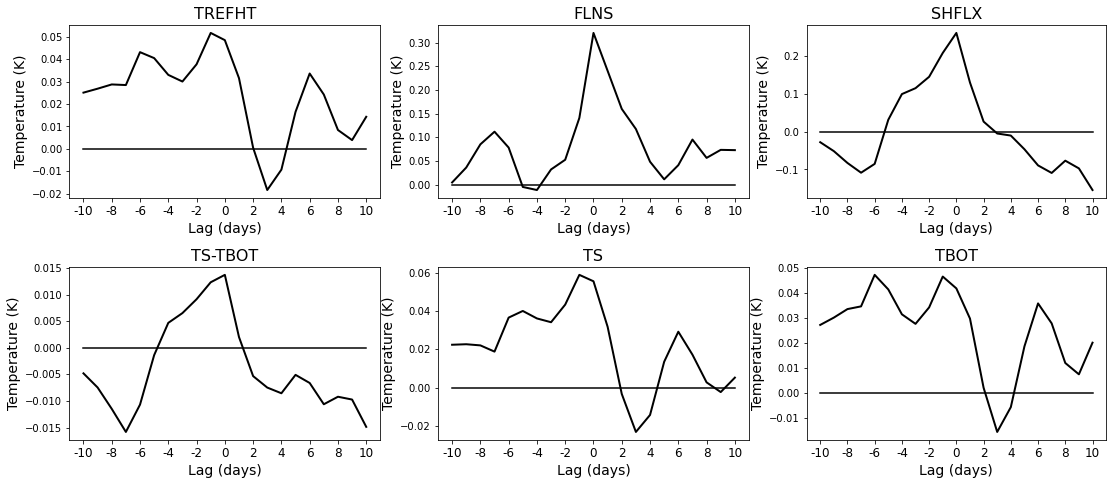

In [34]:
fig = plt.figure(figsize=(16,16))

cityplot=0
#ax = plotlaggedreg(-1.*(data_cam.trefhtregclm5.isel(city=0)),'T2m','Temperature (K)',x1[0],x2[0],y1[0],y2[0], color='black')
#ax = oplotlaggedreg(ax,-1.*(data_cam.trefhtregsnowd.isel(city=0)), color='red')
ax = plotlaggedreg(-1.*(data_cam.trefhtregclm5.isel(city=cityplot) - data_cam.trefhtregsnowd.isel(city=cityplot)),'TREFHT','Temperature (K)',x1[0],x2[0],y1[0],y2[0], color='black')

ax = plotlaggedreg(-1.*(data_cam.flnsregclm5.isel(city=cityplot) - data_cam.flnsregsnowd.isel(city=cityplot)),'FLNS','Temperature (K)',x1[1],x2[1],y1[1],y2[1], color='black')

ax = plotlaggedreg(-1.*(data_cam.shflxregclm5.isel(city=cityplot) - data_cam.shflxregsnowd.isel(city=cityplot)),'SHFLX','Temperature (K)',x1[2],x2[2],y1[2],y2[2], color='black')

tstaketbot_clm5 = data_cam.tsregclm5.isel(city=cityplot) - data_cam.tbotregclm5.isel(city=cityplot)
tstaketbot_snowd = data_cam.tsregsnowd.isel(city=cityplot) - data_cam.tbotregsnowd.isel(city=cityplot)
ax = plotlaggedreg(-1.*(tstaketbot_clm5 - tstaketbot_snowd),'TS-TBOT','Temperature (K)',x1[3],x2[3],y1[3],y2[3], color='black')

ax = plotlaggedreg(-1.*(data_cam.tsregclm5.isel(city=cityplot) - data_cam.tsregsnowd.isel(city=cityplot)),'TS','Temperature (K)',x1[4],x2[4],y1[4],y2[4], color='black')
ax = plotlaggedreg(-1.*(data_cam.tbotregclm5.isel(city=cityplot) - data_cam.tbotregsnowd.isel(city=cityplot)),'TBOT','Temperature (K)',x1[5],x2[5],y1[5],y2[5], color='black')

#ax = plotlaggedreg(-1.*(data_scam.trefhtregclm5.isel(city=0)-data_scam.trefhtregsnowd.isel(city=0)),'T2m','Temperature (K)',x1[0],x2[0],y1[0],y2[0], color='black')
#ax = plotlaggedreg(-1.*(data_cam.trefhtregclm5.isel(city=0)-data_cam.trefhtregsnowd.isel(city=0)),'T2m','Temperature (K)',x1[1],x2[1],y1[1],y2[1], color='black')
#ax = plotlaggedreg(-1.*data_scam.trefhtregclm5.isel(city=0), 'T2m', 'Temperature (K)',x1[0],x2[0],y1[0],y2[0])
#ax = oplotlaggedreg(ax, -1.*data_scam.trefhtregsnowd.isel(city=0), color='forestgreen')

In [19]:
print(data_cam)

<xarray.Dataset>
Dimensions:         (city: 3, lag: 21)
Coordinates:
  * lag             (lag) int64 -10 -9 -8 -7 -6 -5 -4 -3 -2 ... 3 4 5 6 7 8 9 10
  * city            (city) object 'Saskatoon' 'Toronto' 'Siderovsk'
Data variables:
    t850regclm5     (lag, city) float64 ...
    t850regsnowd    (lag, city) float64 ...
    trefhtregclm5   (lag, city) float64 ...
    trefhtregsnowd  (lag, city) float64 ...
    tbotregclm5     (lag, city) float64 ...
    tbotregsnowd    (lag, city) float64 ...
    tsregclm5       (lag, city) float64 ...
    tsregsnowd      (lag, city) float64 ...
    shflxregclm5    (lag, city) float64 ...
    shflxregsnowd   (lag, city) float64 ...
    lhflxregclm5    (lag, city) float64 ...
    lhflxregsnowd   (lag, city) float64 ...
    flnsregclm5     (lag, city) float64 ...
    flnsregsnowd    (lag, city) float64 ...
    fsnsregclm5     (lag, city) float64 ...
    fsnsregsnowd    (lag, city) float64 ...
